In [1]:
print('The answer should be forty-two: {}'.format(str(40+2)))

The answer should be forty-two: 42


In [2]:
# importing utilities
import os
import sys
from datetime import datetime

# importing data science libraries
import pandas as pd
import random as rd
import numpy as np

# importing pytorch libraries
import torch
from torch import nn
from torch import autograd
from torch.utils.data import DataLoader

# import visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image, display
sns.set_style('darkgrid')

# ignore potential warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
USE_CUDA = False

In [5]:
# print CUDNN backend version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The CUDNN backend version: {}'.format(now, torch.backends.cudnn.version()))

[LOG 20191015-12:40:30] The CUDNN backend version: None


In [6]:
# print current Python version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The Python version: {}'.format(now, sys.version))

[LOG 20191015-12:40:30] The Python version: 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [7]:
# print current PyTorch version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The PyTorch version: {}'.format(now, torch.__version__))

[LOG 20191015-12:40:30] The PyTorch version: 1.1.0


In [8]:
# init deterministic seed
seed_value = 1234 #4444 #3333 #2222 #1111 #1234
rd.seed(seed_value) # set random seed
np.random.seed(seed_value) # set numpy seed
torch.manual_seed(seed_value) # set pytorch seed CPU
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    torch.cuda.manual_seed(seed_value) # set pytorch seed GPU

In [9]:
# load the dataset into the notebook kernel
url = './city_payments_fy2017.csv'
ori_dataset = pd.read_csv(url)

In [57]:
# inspect top rows of dataset
ori_dataset.head(20) 

,sub_obj,fy,check_date,document_no,dept,department_title,char_,character_title,fm,sub_obj_title,vendor_name,doc_ref_no_prefix,doc_ref_no_prefix_definition,contract_number,contract_description,transaction_amount
0,231,2017,2017-04-12,CHEK17119771,42,42 COMMERCE,2,02 PURCHASE OF SERVICES,10,OVERTIME MEALS 0231,EAT AT JOE'S,PVXX,payment voucher,NaN,NaN,66.82
1,211,2017,2017-06-09,ACHD17177233,26,26 LICENSES & INSPECTIONS,2,02 PURCHASE OF SERVICES,12,TRANSPORTATION 0211,L & I Â TRAVEL IMPREST FUND,PVXX,payment voucher,NaN,NaN,127.33
2,258,2017,2016-11-25,CHEK17063736,44,44 LAW,2,02 PURCHASE OF SERVICES,5,COURT REPORTERS 0258,"MARLENE BELL REPORTING, INC.",PVXX,payment voucher,NaN,NaN,454.20
3,260,2017,2016-07-07,CHEK17000247,11,11 POLICE,2,02 PURCHASE OF SERVICES,1,REPAIR AND MAINTENANCE CHARGES 0260,RICOH AMERICAS CORPORATION,VCXX,procurement,NaN,NaN,50.00
4,313,2017,2016-07-08,ACHD17000233,23,23 PRISONS,3,03 MATERIALS AND SUPPLIES,1,FOOD 0313,PHILADELPHIA PRISONS,PCXX,petty cash,NaN,NaN,71.92
5,313,2017,2016-07-08,ACHD17000235,23,23 PRISONS,3,03 MATERIALS AND SUPPLIES,1,FOOD 0313,PHILADELPHIA PRISONS,PCXX,petty cash,NaN,NaN,109.61
6,317,2017,2016-07-07,CHEK17003248,22,22 HUMAN SERVICES,3,03 MATERIALS AND SUPPLIES,1,HOSPITAL AND LABORATORY 0317,BANDY COMPANY,VCXX,procurement,150234,Supplies for Child Care Room,1.55
7,260,2017,2016-07-07,CHEK17003564,28,28 WATER,2,02 PURCHASE OF SERVICES,1,REPAIR AND MAINTENANCE CHARGES 0260,OMEGA RESTORATION INC,PVXX,payment voucher,NaN,NaN,3085.36
8,258,2017,2016-07-07,CHEK17003787,44,44 LAW,2,02 PURCHASE OF SERVICES,1,COURT REPORTERS 0258,BISNOW AND JOSEPH LLC,PVXX,payment voucher,NaN,NaN,235.50
9,211,2017,2016-07-08,ACHD17000619,48,48 MAYOR-OFFICE OF THE INSPECTOR GENERAL,2,02 PURCHASE OF SERVICES,1,TRANSPORTATION 0211,MAYOR'S OFFICE/INSP GEN'L IMPREST ACCT,PVXX,payment voucher,NaN,NaN,43.00


In [11]:
# number of anomalies vs. regular transactions
ori_dataset.department_title.value_counts()

25 FLEET MANAGEMENT                         53716
10 MANAGING DIRECTOR                        31179
22 HUMAN SERVICES                           24013
28 WATER                                    19554
14 HEALTH                                   13957
52 FREE LIBRARY                              9427
23 PRISONS                                   9230
11 POLICE                                    6680
42 COMMERCE                                  6580
12 STREETS                                   6348
44 LAW                                       6112
16 RECREATION                                5832
04 MDO-OFFICE OF TECHNOLOGY                  4932
20 PUBLIC PROPERTY                           4848
24 OFFICE OF SUPPORTIVE HOUSING              4711
13 FIRE                                      4317
36 REVENUE                                   4085
26 LICENSES & INSPECTIONS                    3815
69 DISTRICT ATTORNEY                         3811
15 OFFICE OF BH/MR SERVICES                  2461


Text(0.5,1,'Distribution of sub_obj_title attribute values')

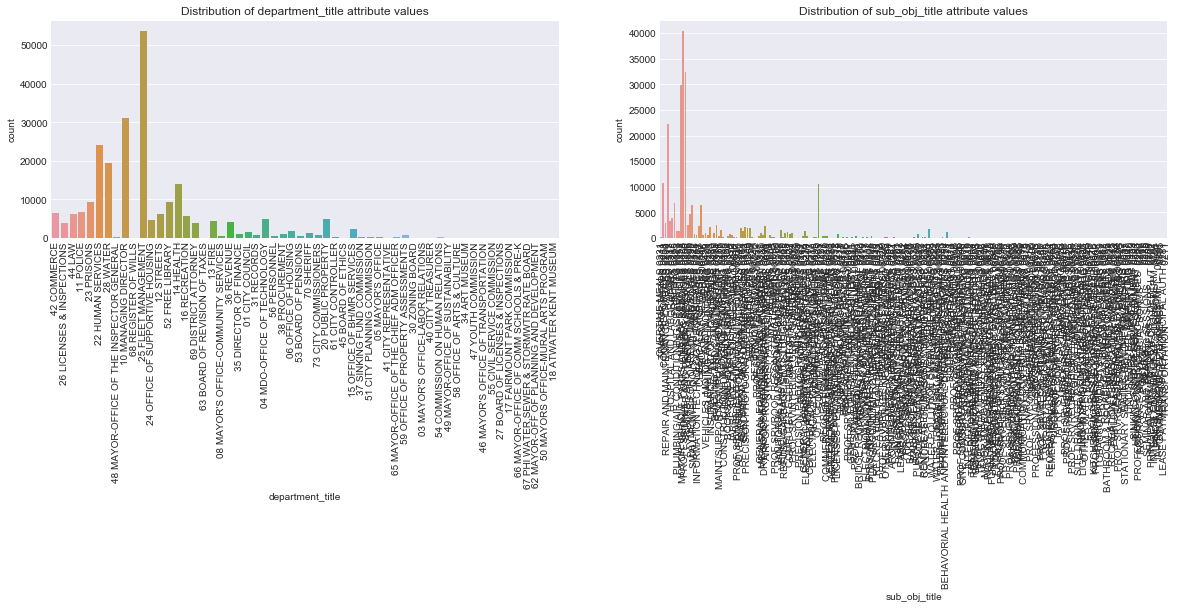

In [12]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=ori_dataset['department_title'], ax=ax[0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of department_title attribute values')

# plot the distribution of the general ledger account attribute
g = sns.countplot(x=ori_dataset['sub_obj_title'], ax=ax[1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of sub_obj_title attribute values')

In [37]:
# select categorical attributes to be "one-hot" encoded

#categorical_attr_names = ['department_title', 'character_title', 'sub_obj_title', 'vendor_name', 'vendor_name', 'doc_ref_no_prefix']
categorical_attr_names = ['department_title']


# encode categorical attributes into a binary one-hot encoded representation 
ori_dataset_categ_transformed = pd.get_dummies(ori_dataset[categorical_attr_names])

In [38]:
# inspect encoded sample transactions
ori_dataset_categ_transformed.head(10)

,department_title_01 CITY COUNCIL,department_title_03 MAYOR'S OFFICE-LABOR RELATIONS,department_title_04 MDO-OFFICE OF TECHNOLOGY,department_title_05 MAYOR'S OFFICE,department_title_06 OFFICE OF HOUSING,department_title_08 MAYOR'S OFFICE-COMMUNITY SERVICES,department_title_10 MANAGING DIRECTOR,department_title_11 POLICE,department_title_12 STREETS,department_title_13 FIRE,...,department_title_61 CITY CONTROLLER,department_title_62 MAYOR-OFF OF PLANNING AND DEVELOPMENT,department_title_63 BOARD OF REVISION OF TAXES,department_title_65 MAYOR-OFFICE OF THE CHIEF ADM OFFICER,department_title_66 MAYOR-OFFICE OF COMM SCHOOLS & PRE-K,"department_title_67 PHI WATER,SEWER & STORMWTR RATE BOARD",department_title_68 REGISTER OF WILLS,department_title_69 DISTRICT ATTORNEY,department_title_70 SHERIFF,department_title_73 CITY COMMISSIONERS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5,1,'Distribution of transaction_amount amount values')

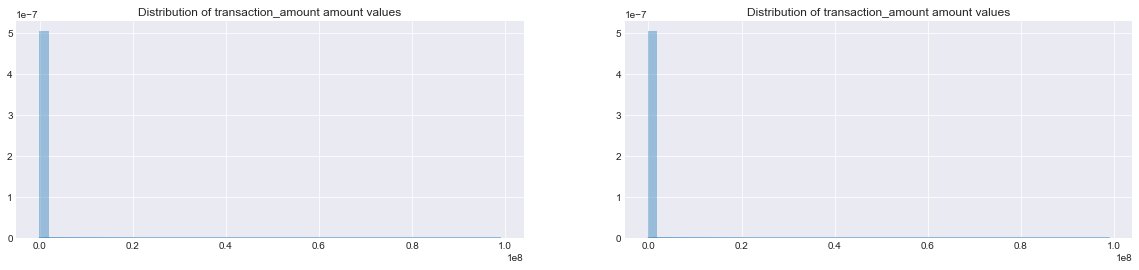

In [39]:
# plot the log-scaled "transaction_amount" as well as the "transaction_amount" attribute value distribution
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)

# plot distribution of the local amount attribute
g = sns.distplot(ori_dataset['transaction_amount'].tolist(), ax=ax[0])
g.set_title('Distribution of transaction_amount amount values')

# plot distribution of the document amount attribute
g = sns.distplot(ori_dataset['transaction_amount'].tolist(), ax=ax[1])
g.set_title('Distribution of transaction_amount amount values')

In [58]:
# select transaction_amount attribute
numeric_attr_names = ['transaction_amount']

# add a small epsilon to eliminate zero values from data for log scaling
numeric_attr = np.abs(ori_dataset[numeric_attr_names]) + 1e-7
numeric_attr = numeric_attr.apply(np.log)

# normalize all numeric attributes to the range [0,1]
ori_dataset_numeric_attr = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())

In [59]:
numeric_attr

,transaction_amount
0,4.202002
1,4.846782
2,6.118538
3,3.912023
4,4.275554
5,4.696929
6,0.438255
7,8.034424
8,5.461711
9,3.761200


In [60]:
# merge categorical and numeric subsets
ori_subset_transformed = pd.concat([ori_dataset_categ_transformed, ori_dataset_numeric_attr], axis = 1)

In [61]:
# inspect final dimensions of pre-processed transactional data
ori_subset_transformed.shape

(238894, 59)

In [62]:
ori_subset_transformed.head(10)

,department_title_01 CITY COUNCIL,department_title_03 MAYOR'S OFFICE-LABOR RELATIONS,department_title_04 MDO-OFFICE OF TECHNOLOGY,department_title_05 MAYOR'S OFFICE,department_title_06 OFFICE OF HOUSING,department_title_08 MAYOR'S OFFICE-COMMUNITY SERVICES,department_title_10 MANAGING DIRECTOR,department_title_11 POLICE,department_title_12 STREETS,department_title_13 FIRE,...,department_title_62 MAYOR-OFF OF PLANNING AND DEVELOPMENT,department_title_63 BOARD OF REVISION OF TAXES,department_title_65 MAYOR-OFFICE OF THE CHIEF ADM OFFICER,department_title_66 MAYOR-OFFICE OF COMM SCHOOLS & PRE-K,"department_title_67 PHI WATER,SEWER & STORMWTR RATE BOARD",department_title_68 REGISTER OF WILLS,department_title_69 DISTRICT ATTORNEY,department_title_70 SHERIFF,department_title_73 CITY COMMISSIONERS,transaction_amount
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.382657
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.410672
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.465928
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.370058
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.385853
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.404161
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.219128
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.549170
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.437390
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.363505


In [63]:
# implementation of the encoder network
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # specify layer 1 - in 618, out 512
        self.encoder_L1 = nn.Linear(in_features=ori_subset_transformed.shape[1], out_features=512, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 512, out 256
        self.encoder_L2 = nn.Linear(512, 256, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 256, out 128
        self.encoder_L3 = nn.Linear(256, 128, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 128, out 64
        self.encoder_L4 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 64, out 32
        self.encoder_L5 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 32, out 16
        self.encoder_L6 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 7 - in 16, out 8
        self.encoder_L7 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 8, out 4
        self.encoder_L8 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L8.weight)
        self.encoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 4, out 3
        self.encoder_L9 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L9.weight)
        self.encoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.dropout(self.encoder_L7(x)))
        x = self.encoder_R8(self.dropout(self.encoder_L8(x)))
        x = self.encoder_R9(self.encoder_L9(x)) # don't apply dropout to the AE bottleneck

        return x

In [64]:
# init training network classes / architectures
encoder_train = encoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    encoder_train = encoder().cuda()

In [65]:
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] encoder architecture:\n\n{}\n'.format(now, encoder_train))

[LOG 20191015-12:58:07] encoder architecture:

encoder(
  (encoder_L1): Linear(in_features=59, out_features=512, bias=True)
  (encoder_R1): LeakyReLU(negative_slope=0.4, inplace)
  (encoder_L2): Linear(in_features=512, out_features=256, bias=True)
  (encoder_R2): LeakyReLU(negative_slope=0.4, inplace)
  (encoder_L3): Linear(in_features=256, out_features=128, bias=True)
  (encoder_R3): LeakyReLU(negative_slope=0.4, inplace)
  (encoder_L4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_R4): LeakyReLU(negative_slope=0.4, inplace)
  (encoder_L5): Linear(in_features=64, out_features=32, bias=True)
  (encoder_R5): LeakyReLU(negative_slope=0.4, inplace)
  (encoder_L6): Linear(in_features=32, out_features=16, bias=True)
  (encoder_R6): LeakyReLU(negative_slope=0.4, inplace)
  (encoder_L7): Linear(in_features=16, out_features=8, bias=True)
  (encoder_R7): LeakyReLU(negative_slope=0.4, inplace)
  (encoder_L8): Linear(in_features=8, out_features=4, bias=True)
  (encoder_R8): Leak

In [66]:
# implementation of the decoder network
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # specify layer 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(4, 8, bias=True)
        nn.init.xavier_uniform_(self.decoder_L2.weight)
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(8, 16, bias=True)
        nn.init.xavier_uniform_(self.decoder_L3.weight)
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(16, 32, bias=True)
        nn.init.xavier_uniform_(self.decoder_L4.weight)
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(32, 64, bias=True)
        nn.init.xavier_uniform_(self.decoder_L5.weight)
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(64, 128, bias=True)
        nn.init.xavier_uniform_(self.decoder_L6.weight)
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # specify layer 7 - in 128, out 256
        self.decoder_L7 = nn.Linear(128, 256, bias=True)
        nn.init.xavier_uniform_(self.decoder_L7.weight)
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 256, out 512
        self.decoder_L8 = nn.Linear(256, 512, bias=True)
        nn.init.xavier_uniform_(self.decoder_L8.weight)
        self.decoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 512, out 618
        self.decoder_L9 = nn.Linear(in_features=512, out_features=ori_subset_transformed.shape[1], bias=True)
        nn.init.xavier_uniform_(self.decoder_L9.weight)
        self.decoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.dropout(self.decoder_L7(x)))
        x = self.decoder_R8(self.dropout(self.decoder_L8(x)))
        x = self.decoder_R9(self.decoder_L9(x)) # don't apply dropout to the AE output
        
        return x

In [67]:
# define the optimization criterion / loss function
loss_function = nn.BCEWithLogitsLoss(reduction='mean')


In [68]:
# define learning rate and optimization strategy
decoder_train = decoder()
learning_rate = 1e-3
encoder_optimizer = torch.optim.Adam(encoder_train.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder_train.parameters(), lr=learning_rate)

In [69]:
# specify training parameters
num_epochs = 5
mini_batch_size = 128

In [70]:
# convert pre-processed data to pytorch tensor
torch_dataset = torch.from_numpy(ori_subset_transformed.values).float()

# convert to pytorch tensor - none cuda enabled
dataloader = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=True, num_workers=0)
# note: we set num_workers to zero to retrieve deterministic results

# determine if CUDA is available at compute node
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    dataloader = DataLoader(torch_dataset.cuda(), batch_size=mini_batch_size, shuffle=True)

In [72]:
# init collection of epoch losses
epoch_losses = []

# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_dataset)

# train autoencoder model
for epoch in range(num_epochs):

    # init collection of epoch losses
    mini_batch_losses = []
    
    # init mini batch counter
    mini_batch_count = 0
    
    # determine if CUDA is available at compute node
    if(torch.backends.cudnn.version() != None) and (USE_CUDA == True):
        
        # set networks / models in GPU mode
        encoder_train.cuda()
        decoder_train.cuda()

    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()

    # start timer
    start_time = datetime.now()
        
    # iterate over all mini-batches
    for mini_batch_data in dataloader:

        # increase mini batch counter
        mini_batch_count += 1

        # convert mini batch to torch variable
        mini_batch_torch = autograd.Variable(mini_batch_data)

        # =================== (1) forward pass ===================================
        
        # run forward pass
        z_representation = encoder_train(mini_batch_torch) # encode mini-batch data
        mini_batch_reconstruction = decoder_train(z_representation) # decode mini-batch data
        
        # =================== (2) compute reconstruction loss ====================

        # determine reconstruction loss
        reconstruction_loss = loss_function(mini_batch_reconstruction, mini_batch_torch)
        
        # =================== (3) backward pass ==================================

        # reset graph gradients
        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()

        # run backward pass
        reconstruction_loss.backward()
        
        # =================== (4) update model parameters ========================

        # update network parameters
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== monitor training progress ==========================

        # print training progress each 1'000 mini-batches
        if mini_batch_count % 10 == 0:
            
            # print the training mode: either on GPU or CPU
            mode = 'GPU' if (torch.backends.cudnn.version() != None) and (USE_CUDA == True) else 'CPU'
            
            # print mini batch reconstuction results
            now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
            end_time = datetime.now() - start_time
            print('[LOG {}] training status, epoch: [{:04}/{:04}], batch: {:04}, loss: {}, mode: {}, time required: {}'.format(now, (epoch+1), num_epochs, mini_batch_count, np.round(reconstruction_loss.item(), 4), mode, end_time))

            # reset timer
            start_time = datetime.now()
            
        # collect mini-batch loss
        mini_batch_losses.extend([np.round(reconstruction_loss.item(), 4)])

    # =================== evaluate model performance =============================
                                 
    # collect mean training epoch loss
    epoch_losses.extend([np.mean(mini_batch_losses)])
    
    # print training epoch results
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] training status, epoch: [{:04}/{:04}], loss: {:.10f}'.format(now, (epoch+1), num_epochs, np.mean(mini_batch_losses)))

    # =================== save model snapshot to disk ============================
    
    # save trained encoder model file to disk
    encoder_model_name = "ep_{}_encoder_model.pth".format((epoch+1))
    torch.save(encoder_train.state_dict(), encoder_model_name)

    # save trained decoder model file to disk
    decoder_model_name = "ep_{}_decoder_model.pth".format((epoch+1))
    torch.save(decoder_train.state_dict(), decoder_model_name)

[LOG 20191015-12:58:20] training status, epoch: [0001/0005], batch: 0010, loss: 0.4932, mode: CPU, time required: 0:00:00.157595
[LOG 20191015-12:58:20] training status, epoch: [0001/0005], batch: 0020, loss: 0.0953, mode: CPU, time required: 0:00:00.104693
[LOG 20191015-12:58:20] training status, epoch: [0001/0005], batch: 0030, loss: 0.0799, mode: CPU, time required: 0:00:00.103945
[LOG 20191015-12:58:20] training status, epoch: [0001/0005], batch: 0040, loss: 0.0827, mode: CPU, time required: 0:00:00.107159
[LOG 20191015-12:58:20] training status, epoch: [0001/0005], batch: 0050, loss: 0.0765, mode: CPU, time required: 0:00:00.115106
[LOG 20191015-12:58:20] training status, epoch: [0001/0005], batch: 0060, loss: 0.0739, mode: CPU, time required: 0:00:00.140015
[LOG 20191015-12:58:21] training status, epoch: [0001/0005], batch: 0070, loss: 0.0746, mode: CPU, time required: 0:00:00.110384
[LOG 20191015-12:58:21] training status, epoch: [0001/0005], batch: 0080, loss: 0.0746, mode: CPU

[LOG 20191015-12:58:28] training status, epoch: [0001/0005], batch: 0660, loss: 0.0347, mode: CPU, time required: 0:00:00.110802
[LOG 20191015-12:58:28] training status, epoch: [0001/0005], batch: 0670, loss: 0.0334, mode: CPU, time required: 0:00:00.229774
[LOG 20191015-12:58:29] training status, epoch: [0001/0005], batch: 0680, loss: 0.0339, mode: CPU, time required: 0:00:00.174051
[LOG 20191015-12:58:29] training status, epoch: [0001/0005], batch: 0690, loss: 0.0358, mode: CPU, time required: 0:00:00.131969
[LOG 20191015-12:58:29] training status, epoch: [0001/0005], batch: 0700, loss: 0.0275, mode: CPU, time required: 0:00:00.151896
[LOG 20191015-12:58:29] training status, epoch: [0001/0005], batch: 0710, loss: 0.0324, mode: CPU, time required: 0:00:00.167076
[LOG 20191015-12:58:29] training status, epoch: [0001/0005], batch: 0720, loss: 0.0353, mode: CPU, time required: 0:00:00.125612
[LOG 20191015-12:58:29] training status, epoch: [0001/0005], batch: 0730, loss: 0.0249, mode: CPU

[LOG 20191015-12:58:37] training status, epoch: [0001/0005], batch: 1310, loss: 0.0174, mode: CPU, time required: 0:00:00.208732
[LOG 20191015-12:58:37] training status, epoch: [0001/0005], batch: 1320, loss: 0.0187, mode: CPU, time required: 0:00:00.124867
[LOG 20191015-12:58:37] training status, epoch: [0001/0005], batch: 1330, loss: 0.0183, mode: CPU, time required: 0:00:00.117600
[LOG 20191015-12:58:37] training status, epoch: [0001/0005], batch: 1340, loss: 0.019, mode: CPU, time required: 0:00:00.112700
[LOG 20191015-12:58:38] training status, epoch: [0001/0005], batch: 1350, loss: 0.0151, mode: CPU, time required: 0:00:00.106253
[LOG 20191015-12:58:38] training status, epoch: [0001/0005], batch: 1360, loss: 0.0168, mode: CPU, time required: 0:00:00.122732
[LOG 20191015-12:58:38] training status, epoch: [0001/0005], batch: 1370, loss: 0.0178, mode: CPU, time required: 0:00:00.117018
[LOG 20191015-12:58:38] training status, epoch: [0001/0005], batch: 1380, loss: 0.0143, mode: CPU,

[LOG 20191015-12:58:45] training status, epoch: [0002/0005], batch: 0090, loss: 0.0126, mode: CPU, time required: 0:00:00.102499
[LOG 20191015-12:58:45] training status, epoch: [0002/0005], batch: 0100, loss: 0.0133, mode: CPU, time required: 0:00:00.105392
[LOG 20191015-12:58:45] training status, epoch: [0002/0005], batch: 0110, loss: 0.0133, mode: CPU, time required: 0:00:00.111265
[LOG 20191015-12:58:45] training status, epoch: [0002/0005], batch: 0120, loss: 0.0146, mode: CPU, time required: 0:00:00.107522
[LOG 20191015-12:58:45] training status, epoch: [0002/0005], batch: 0130, loss: 0.0125, mode: CPU, time required: 0:00:00.106837
[LOG 20191015-12:58:45] training status, epoch: [0002/0005], batch: 0140, loss: 0.0128, mode: CPU, time required: 0:00:00.110314
[LOG 20191015-12:58:46] training status, epoch: [0002/0005], batch: 0150, loss: 0.0128, mode: CPU, time required: 0:00:00.111171
[LOG 20191015-12:58:46] training status, epoch: [0002/0005], batch: 0160, loss: 0.0127, mode: CPU

[LOG 20191015-12:58:52] training status, epoch: [0002/0005], batch: 0730, loss: 0.0127, mode: CPU, time required: 0:00:00.116219
[LOG 20191015-12:58:52] training status, epoch: [0002/0005], batch: 0740, loss: 0.0139, mode: CPU, time required: 0:00:00.108528
[LOG 20191015-12:58:52] training status, epoch: [0002/0005], batch: 0750, loss: 0.0126, mode: CPU, time required: 0:00:00.112252
[LOG 20191015-12:58:52] training status, epoch: [0002/0005], batch: 0760, loss: 0.0134, mode: CPU, time required: 0:00:00.112325
[LOG 20191015-12:58:52] training status, epoch: [0002/0005], batch: 0770, loss: 0.0124, mode: CPU, time required: 0:00:00.110191
[LOG 20191015-12:58:52] training status, epoch: [0002/0005], batch: 0780, loss: 0.0127, mode: CPU, time required: 0:00:00.111818
[LOG 20191015-12:58:53] training status, epoch: [0002/0005], batch: 0790, loss: 0.0129, mode: CPU, time required: 0:00:00.110200
[LOG 20191015-12:58:53] training status, epoch: [0002/0005], batch: 0800, loss: 0.0128, mode: CPU

[LOG 20191015-12:58:59] training status, epoch: [0002/0005], batch: 1370, loss: 0.0133, mode: CPU, time required: 0:00:00.120797
[LOG 20191015-12:58:59] training status, epoch: [0002/0005], batch: 1380, loss: 0.0129, mode: CPU, time required: 0:00:00.112274
[LOG 20191015-12:59:00] training status, epoch: [0002/0005], batch: 1390, loss: 0.0121, mode: CPU, time required: 0:00:00.112801
[LOG 20191015-12:59:00] training status, epoch: [0002/0005], batch: 1400, loss: 0.0121, mode: CPU, time required: 0:00:00.112904
[LOG 20191015-12:59:00] training status, epoch: [0002/0005], batch: 1410, loss: 0.0118, mode: CPU, time required: 0:00:00.112400
[LOG 20191015-12:59:00] training status, epoch: [0002/0005], batch: 1420, loss: 0.0127, mode: CPU, time required: 0:00:00.115734
[LOG 20191015-12:59:00] training status, epoch: [0002/0005], batch: 1430, loss: 0.0121, mode: CPU, time required: 0:00:00.113871
[LOG 20191015-12:59:00] training status, epoch: [0002/0005], batch: 1440, loss: 0.0121, mode: CPU

[LOG 20191015-12:59:07] training status, epoch: [0003/0005], batch: 0150, loss: 0.0117, mode: CPU, time required: 0:00:00.129452
[LOG 20191015-12:59:07] training status, epoch: [0003/0005], batch: 0160, loss: 0.0129, mode: CPU, time required: 0:00:00.122343
[LOG 20191015-12:59:07] training status, epoch: [0003/0005], batch: 0170, loss: 0.0123, mode: CPU, time required: 0:00:00.118877
[LOG 20191015-12:59:07] training status, epoch: [0003/0005], batch: 0180, loss: 0.0117, mode: CPU, time required: 0:00:00.116703
[LOG 20191015-12:59:08] training status, epoch: [0003/0005], batch: 0190, loss: 0.0133, mode: CPU, time required: 0:00:00.224305
[LOG 20191015-12:59:08] training status, epoch: [0003/0005], batch: 0200, loss: 0.0134, mode: CPU, time required: 0:00:00.115994
[LOG 20191015-12:59:08] training status, epoch: [0003/0005], batch: 0210, loss: 0.0132, mode: CPU, time required: 0:00:00.116143
[LOG 20191015-12:59:08] training status, epoch: [0003/0005], batch: 0220, loss: 0.0121, mode: CPU

[LOG 20191015-12:59:15] training status, epoch: [0003/0005], batch: 0790, loss: 0.0116, mode: CPU, time required: 0:00:00.112673
[LOG 20191015-12:59:15] training status, epoch: [0003/0005], batch: 0800, loss: 0.0116, mode: CPU, time required: 0:00:00.117939
[LOG 20191015-12:59:15] training status, epoch: [0003/0005], batch: 0810, loss: 0.0122, mode: CPU, time required: 0:00:00.114007
[LOG 20191015-12:59:15] training status, epoch: [0003/0005], batch: 0820, loss: 0.0117, mode: CPU, time required: 0:00:00.111556
[LOG 20191015-12:59:16] training status, epoch: [0003/0005], batch: 0830, loss: 0.012, mode: CPU, time required: 0:00:00.113249
[LOG 20191015-12:59:16] training status, epoch: [0003/0005], batch: 0840, loss: 0.0131, mode: CPU, time required: 0:00:00.117913
[LOG 20191015-12:59:16] training status, epoch: [0003/0005], batch: 0850, loss: 0.0116, mode: CPU, time required: 0:00:00.119248
[LOG 20191015-12:59:16] training status, epoch: [0003/0005], batch: 0860, loss: 0.0117, mode: CPU,

[LOG 20191015-12:59:22] training status, epoch: [0003/0005], batch: 1430, loss: 0.0117, mode: CPU, time required: 0:00:00.120500
[LOG 20191015-12:59:23] training status, epoch: [0003/0005], batch: 1440, loss: 0.0121, mode: CPU, time required: 0:00:00.116960
[LOG 20191015-12:59:23] training status, epoch: [0003/0005], batch: 1450, loss: 0.0121, mode: CPU, time required: 0:00:00.129095
[LOG 20191015-12:59:23] training status, epoch: [0003/0005], batch: 1460, loss: 0.0118, mode: CPU, time required: 0:00:00.112895
[LOG 20191015-12:59:23] training status, epoch: [0003/0005], batch: 1470, loss: 0.0117, mode: CPU, time required: 0:00:00.117756
[LOG 20191015-12:59:23] training status, epoch: [0003/0005], batch: 1480, loss: 0.012, mode: CPU, time required: 0:00:00.114651
[LOG 20191015-12:59:23] training status, epoch: [0003/0005], batch: 1490, loss: 0.0124, mode: CPU, time required: 0:00:00.116997
[LOG 20191015-12:59:23] training status, epoch: [0003/0005], batch: 1500, loss: 0.0117, mode: CPU,

[LOG 20191015-12:59:30] training status, epoch: [0004/0005], batch: 0200, loss: 0.0117, mode: CPU, time required: 0:00:00.119364
[LOG 20191015-12:59:30] training status, epoch: [0004/0005], batch: 0210, loss: 0.0126, mode: CPU, time required: 0:00:00.115855
[LOG 20191015-12:59:30] training status, epoch: [0004/0005], batch: 0220, loss: 0.0124, mode: CPU, time required: 0:00:00.125297
[LOG 20191015-12:59:30] training status, epoch: [0004/0005], batch: 0230, loss: 0.012, mode: CPU, time required: 0:00:00.118694
[LOG 20191015-12:59:31] training status, epoch: [0004/0005], batch: 0240, loss: 0.012, mode: CPU, time required: 0:00:00.121170
[LOG 20191015-12:59:31] training status, epoch: [0004/0005], batch: 0250, loss: 0.0116, mode: CPU, time required: 0:00:00.118517
[LOG 20191015-12:59:31] training status, epoch: [0004/0005], batch: 0260, loss: 0.0116, mode: CPU, time required: 0:00:00.122472
[LOG 20191015-12:59:31] training status, epoch: [0004/0005], batch: 0270, loss: 0.0118, mode: CPU, 

[LOG 20191015-12:59:40] training status, epoch: [0004/0005], batch: 0840, loss: 0.0117, mode: CPU, time required: 0:00:00.178069
[LOG 20191015-12:59:40] training status, epoch: [0004/0005], batch: 0850, loss: 0.0123, mode: CPU, time required: 0:00:00.174694
[LOG 20191015-12:59:40] training status, epoch: [0004/0005], batch: 0860, loss: 0.0117, mode: CPU, time required: 0:00:00.118716
[LOG 20191015-12:59:41] training status, epoch: [0004/0005], batch: 0870, loss: 0.0118, mode: CPU, time required: 0:00:00.248715
[LOG 20191015-12:59:41] training status, epoch: [0004/0005], batch: 0880, loss: 0.0117, mode: CPU, time required: 0:00:00.135625
[LOG 20191015-12:59:41] training status, epoch: [0004/0005], batch: 0890, loss: 0.0117, mode: CPU, time required: 0:00:00.115912
[LOG 20191015-12:59:41] training status, epoch: [0004/0005], batch: 0900, loss: 0.0133, mode: CPU, time required: 0:00:00.117035
[LOG 20191015-12:59:41] training status, epoch: [0004/0005], batch: 0910, loss: 0.013, mode: CPU,

[LOG 20191015-12:59:49] training status, epoch: [0004/0005], batch: 1480, loss: 0.0117, mode: CPU, time required: 0:00:00.129705
[LOG 20191015-12:59:49] training status, epoch: [0004/0005], batch: 1490, loss: 0.0125, mode: CPU, time required: 0:00:00.115583
[LOG 20191015-12:59:49] training status, epoch: [0004/0005], batch: 1500, loss: 0.0124, mode: CPU, time required: 0:00:00.122314
[LOG 20191015-12:59:49] training status, epoch: [0004/0005], batch: 1510, loss: 0.012, mode: CPU, time required: 0:00:00.125183
[LOG 20191015-12:59:50] training status, epoch: [0004/0005], batch: 1520, loss: 0.0122, mode: CPU, time required: 0:00:00.137269
[LOG 20191015-12:59:50] training status, epoch: [0004/0005], batch: 1530, loss: 0.0118, mode: CPU, time required: 0:00:00.121547
[LOG 20191015-12:59:50] training status, epoch: [0004/0005], batch: 1540, loss: 0.012, mode: CPU, time required: 0:00:00.118675
[LOG 20191015-12:59:50] training status, epoch: [0004/0005], batch: 1550, loss: 0.0119, mode: CPU, 

[LOG 20191015-12:59:57] training status, epoch: [0005/0005], batch: 0250, loss: 0.0123, mode: CPU, time required: 0:00:00.111881
[LOG 20191015-12:59:57] training status, epoch: [0005/0005], batch: 0260, loss: 0.0123, mode: CPU, time required: 0:00:00.114400
[LOG 20191015-12:59:57] training status, epoch: [0005/0005], batch: 0270, loss: 0.012, mode: CPU, time required: 0:00:00.121533
[LOG 20191015-12:59:57] training status, epoch: [0005/0005], batch: 0280, loss: 0.012, mode: CPU, time required: 0:00:00.129469
[LOG 20191015-12:59:57] training status, epoch: [0005/0005], batch: 0290, loss: 0.0124, mode: CPU, time required: 0:00:00.134811
[LOG 20191015-12:59:57] training status, epoch: [0005/0005], batch: 0300, loss: 0.0127, mode: CPU, time required: 0:00:00.115370
[LOG 20191015-12:59:57] training status, epoch: [0005/0005], batch: 0310, loss: 0.0121, mode: CPU, time required: 0:00:00.119482
[LOG 20191015-12:59:58] training status, epoch: [0005/0005], batch: 0320, loss: 0.0117, mode: CPU, 

[LOG 20191015-13:00:04] training status, epoch: [0005/0005], batch: 0890, loss: 0.0122, mode: CPU, time required: 0:00:00.134057
[LOG 20191015-13:00:04] training status, epoch: [0005/0005], batch: 0900, loss: 0.0116, mode: CPU, time required: 0:00:00.130674
[LOG 20191015-13:00:05] training status, epoch: [0005/0005], batch: 0910, loss: 0.0121, mode: CPU, time required: 0:00:00.128478
[LOG 20191015-13:00:05] training status, epoch: [0005/0005], batch: 0920, loss: 0.0116, mode: CPU, time required: 0:00:00.127988
[LOG 20191015-13:00:05] training status, epoch: [0005/0005], batch: 0930, loss: 0.0127, mode: CPU, time required: 0:00:00.131324
[LOG 20191015-13:00:05] training status, epoch: [0005/0005], batch: 0940, loss: 0.0116, mode: CPU, time required: 0:00:00.138085
[LOG 20191015-13:00:05] training status, epoch: [0005/0005], batch: 0950, loss: 0.0122, mode: CPU, time required: 0:00:00.140038
[LOG 20191015-13:00:05] training status, epoch: [0005/0005], batch: 0960, loss: 0.0118, mode: CPU

[LOG 20191015-13:00:13] training status, epoch: [0005/0005], batch: 1530, loss: 0.0118, mode: CPU, time required: 0:00:00.114482
[LOG 20191015-13:00:13] training status, epoch: [0005/0005], batch: 1540, loss: 0.0126, mode: CPU, time required: 0:00:00.112144
[LOG 20191015-13:00:13] training status, epoch: [0005/0005], batch: 1550, loss: 0.0118, mode: CPU, time required: 0:00:00.115181
[LOG 20191015-13:00:13] training status, epoch: [0005/0005], batch: 1560, loss: 0.0123, mode: CPU, time required: 0:00:00.115798
[LOG 20191015-13:00:13] training status, epoch: [0005/0005], batch: 1570, loss: 0.0118, mode: CPU, time required: 0:00:00.114830
[LOG 20191015-13:00:13] training status, epoch: [0005/0005], batch: 1580, loss: 0.0126, mode: CPU, time required: 0:00:00.112787
[LOG 20191015-13:00:13] training status, epoch: [0005/0005], batch: 1590, loss: 0.012, mode: CPU, time required: 0:00:00.117960
[LOG 20191015-13:00:13] training status, epoch: [0005/0005], batch: 1600, loss: 0.0121, mode: CPU,

Text(0.5,1,'AENN training performance')

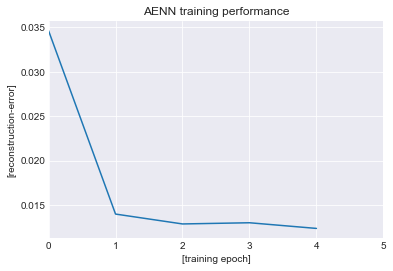

In [73]:
# plot the training progress
plt.plot(range(0, len(epoch_losses)), epoch_losses)
plt.xlabel('[training epoch]')
plt.xlim([0, len(epoch_losses)])
plt.ylabel('[reconstruction-error]')
#plt.ylim([0.0, 1.0])
plt.title('AENN training performance')